In [1]:
from astropy.cosmology import Planck18, z_at_value, FlatLambdaCDM
import astropy.units as u
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.constants import k_B
from scipy.integrate import quad


In [2]:
%matplotlib widget

Particles 	Mass 	spin 	color 	g 

Photon (γ) 	0 	2 	1 	2
W+,W−	80.4GeV	3 	1 	6
Z	91.2GeV	3 	1 	3
Gluon (g) 	0 	2 	8 	16
Higgs boson 	>114GeV	1 	1 	1

Bosons 		28

u,/,u¯	3MeV	2 	3 	12
d,/,d¯	6MeV	2 	3 	12
s,/,s¯	100MeV	2 	3 	12
c,/,c¯	1.2GeV	2 	3 	12
b,/,b¯	4.2GeV	2 	3 	12
t,/,t¯	175GeV	2 	3 	12
e+,e−	0.511MeV	2 	1 	4
μ+,μ−	105.7MeV	2 	1 	4
τ+,τ−	1.777GeV	2 	1 	4
νe,νe¯	<3eV	1 	1 	2
νμ,νμ¯	<0.19MeV	1 	1 	2
ντ,ντ¯	<18.2MeV	1 	1 	2


Fermions 		90




In [3]:
t = """Particles	Type\tMass	spin	color	g\tQCD
γ 	boson\t     0 	2 	1 	2\tFalse
W+,W−	boson\t     80.4GeV	3 	1 	6\tFalse
Z	boson\t     91.2GeV	3 	1 	3\tFalse
Gluons 	boson\t     0 	2 	8 	16\tTrue
Higgs 	boson\t     125.3GeV	1 	1 	1\tFalse
u,u¯	fermion\t     2MeV	2 	3 	12\tTrue
d,d¯	fermion\t    5MeV	2 	3 	12\tTrue
s,s¯	fermion\t    100MeV	2 	3 	12\tTrue
c,c¯	fermion\t    1GeV	2 	3 	12\tTrue
b,b¯	fermion\t    4GeV	2 	3 	12\tTrue
t,t¯	fermion\t    173GeV	2 	3 	12\tTrue
e+,e−	fermion\t    0.511MeV	2 	1 	4\tFalse
μ+,μ−	fermion\t    105.7MeV	2 	1 	4\tFalse
τ+,τ−	fermion\t    1.777GeV	2 	1 	4\tFalse
pions	boson\t    135MeV	1 	1 	3\tFalse
νe,νe¯	fermion\t    <3eV	1 	1 	2\tFalse
νμ,νμ¯	fermion\t    <0.19MeV	1 	1 	2\tFalse
ντ,ντ¯	fermion\t    <18.2MeV	1 	1 	2\tFalse
"""

In [4]:
with open("particle_g.csv", 'w') as f:
    f.write(t)

In [5]:
df = pd.read_csv("particle_g.csv", delimiter="\t")

In [6]:
#| label: gtable
df

,Particles,Type,Mass,spin,color,g,QCD
0,γ,boson,0,2,1,2,False
1,"W+,W−",boson,80.4GeV,3,1,6,False
2,Z,boson,91.2GeV,3,1,3,False
3,Gluons,boson,0,2,8,16,True
4,Higgs,boson,125.3GeV,1,1,1,False
5,"u,u¯",fermion,2MeV,2,3,12,True
6,"d,d¯",fermion,5MeV,2,3,12,True
7,"s,s¯",fermion,100MeV,2,3,12,True
8,"c,c¯",fermion,1GeV,2,3,12,True
9,"b,b¯",fermion,4GeV,2,3,12,True


In [7]:
mass_txt = df["Mass"]
mass_MeV = []
for m in mass_txt:
    if "eV" in m:
        if "<" in m:
            mass_MeV.append(0)
        elif "GeV" in m:
            mass_MeV.append(float(m.split('GeV')[0])*1e3)
        elif "MeV" in m:
            mass_MeV.append(float(m.split('MeV')[0]))
    else:
        mass_MeV.append(float(m))
mass_MeV = np.array(mass_MeV)

In [8]:
mass_T = mass_MeV / 1.38e-23 * 1.6e-19 * 1e6

$a_0 T_{CMB} = a T$

In [9]:
a = 2.725 / mass_T
z = 1/a - 1
z[z < 0] = np.inf

/var/folders/jk/kyldbk_95pl2fc_t8qb_l8580000gw/T/ipykernel_13962/1147251717.py:1: RuntimeWarning: divide by zero encountered in divide
  a = 2.725 / mass_T


In [10]:
T0 = Planck18.Tcmb0  # K
cosmo = FlatLambdaCDM(H0=Planck18.H0, Om0=Planck18.Om0, Tcmb0=T0, m_nu=0)
Omegar0 = cosmo.Ogamma0 + cosmo.Onu0  # with massless neutrinos
Omegar0

9.131600127112836e-05

In [11]:
invH0 = (1/Planck18.H0).to(u.s).value
invH0

4.560563969097498e+17

In [12]:
def inv_aH(a):
    return (invH0/(a*(np.sqrt(Omegar0 / a**4))))

def a_to_time(a):
    return quad(inv_aH, 0, a)[0]

def T_to_time(T):
    return a_to_time(T0.to(u.K).value / T)

def T_to_MeV(T):
    return T * 1.38e-23 / (1.6e-19 * 1e6)

def MeV_to_time(MeV):
    T = MeV / 1.38e-23 * 1.6e-19 * 1e6
    return T_to_time(T)

MeV_to_time(150)

5.860614772784434e-05

In [13]:
t = [MeV_to_time(mass_MeV[k]) for k in range(len(mass_MeV))]

/var/folders/jk/kyldbk_95pl2fc_t8qb_l8580000gw/T/ipykernel_13962/1109799512.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  return a_to_time(T0.to(u.K).value / T)
/var/folders/jk/kyldbk_95pl2fc_t8qb_l8580000gw/T/ipykernel_13962/1109799512.py:5: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(inv_aH, 0, a)[0]


In [14]:
df["MeV"] = mass_MeV
df["a"] = a
df["z"] = z
df["t"] = t
df.sort_values("MeV")

,Particles,Type,Mass,spin,color,g,QCD,MeV,a,z,t
0,γ,boson,0,2,1,2,False,0.000,inf,inf,2.386245e+19
15,"νe,νe¯",fermion,<3eV,1,1,2,False,0.000,inf,inf,2.386245e+19
16,"νμ,νμ¯",fermion,<0.19MeV,1,1,2,False,0.000,inf,inf,2.386245e+19
17,"ντ,ντ¯",fermion,<18.2MeV,1,1,2,False,0.000,inf,inf,2.386245e+19
3,Gluons,boson,0,2,8,16,True,0.000,inf,inf,2.386245e+19
11,"e+,e−",fermion,0.511MeV,2,1,4,False,0.511,4.599437e-10,2.174179e+09,5.049913e+00
5,"u,u¯",fermion,2MeV,2,3,12,True,2.000,1.175156e-10,8.509507e+09,3.296596e-01
6,"d,d¯",fermion,5MeV,2,3,12,True,5.000,4.700625e-11,2.127377e+10,5.274553e-02
7,"s,s¯",fermion,100MeV,2,3,12,True,100.000,2.350313e-12,4.254753e+11,1.318638e-04
12,"μ+,μ−",fermion,105.7MeV,2,1,4,False,105.700,2.223569e-12,4.497274e+11,1.180255e-04


In [15]:
def gs_tot(MeV, entropy=False):
    if MeV > 150:
        gb = np.sum(df["g"][(df["MeV"] < MeV) & (df["Type"]=="boson") & (df["Particles"]!="pions")])
        gf = np.sum(df["g"][(df["MeV"] < MeV) & (df["Type"]=="fermion")])
    elif MeV < 150 and MeV >= 0.511:  # QCD phase transition
        gb = np.sum(df["g"][(df["MeV"] < MeV) & (df["Type"]=="boson") & (df["QCD"]==False)])
        gf = np.sum(df["g"][(df["MeV"] < MeV) & (df["Type"]=="fermion") & (df["QCD"]==False)])
    elif MeV < 0.511:  # e+/e- annihilation
        gb = 2
        if not entropy:
            gf = 2 * 3 * (4/11)**(4/3)  # neutrinos at lower T
        else:
            gf = 2 * 3 * (4/11)
    return gb + 7/8 * gf

gs_tot(1e6)

106.75

In [16]:
MeVs = np.sort(np.concatenate([np.logspace(-2, 7, 1000), df["MeV"]]))
ts = [MeV_to_time(MeV) for MeV in MeVs]
gs = [gs_tot(MeV) for MeV in MeVs]

/var/folders/jk/kyldbk_95pl2fc_t8qb_l8580000gw/T/ipykernel_13962/1109799512.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  return a_to_time(T0.to(u.K).value / T)
/var/folders/jk/kyldbk_95pl2fc_t8qb_l8580000gw/T/ipykernel_13962/1109799512.py:5: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(inv_aH, 0, a)[0]


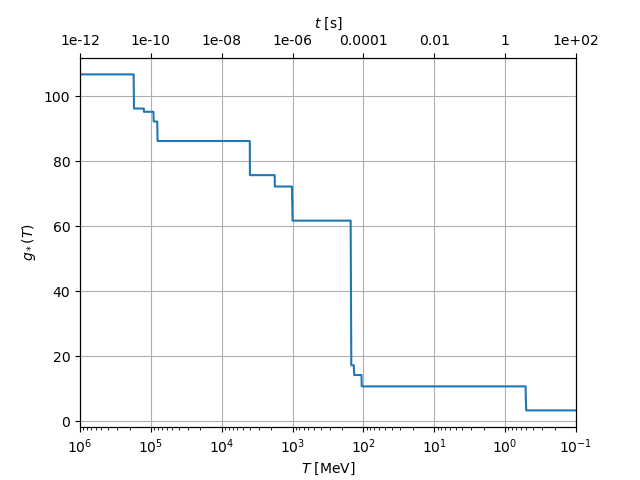

In [59]:
#| label: ggstar_plot
fig = plt.figure()
plt.plot(MeVs, gs)
plt.grid()
plt.xscale("log")
plt.xlim((1e6, 1e-1))
ax1 = plt.gca()
#ax1.invert_xaxis()
ax2 = plt.gca().twiny()
ax2.set_xscale("log")
ticks = ax1.get_xticks()[::-1][1:-1]
ticks = ticks[(ticks>=MeVs.min()) & (ticks<=MeVs.max())]
#print(ticks)
#ticks = 10.**np.arange(6, -3, -1)
#print(ticks)
new_ticks = [MeV_to_time(tick) for tick in ticks]
#print(new_ticks)
ax2.set_xticks(new_ticks)
ax2.set_xticklabels([f"{tick:.0g}" for tick in new_ticks])
ax2.set_xlabel("$t$ [s]")
ax1.set_ylabel("$g_*(T)$")
ax1.set_xlabel("$T$ [MeV]")
plt.show()

\begin{equation}
  \boxed{T \propto \left[g_{\star S}^{1/3}(T) a\right]^{-1}}
\end{equation}


In [18]:
def T_precise(a):
    T_tmp = T0 / a
    gs0 = gs_tot(T_to_MeV(T0).value, entropy=True)
    for k in range(10):
        T_tmp = T0 * (gs0/gs_tot(T_to_MeV(T_tmp).value, entropy=True))**(1/3) / a
    return T_tmp

T_precise(a=1e-5)

<Quantity 272550. K>

In [57]:
a = np.logspace(-15, -8, 1000)
Ts = [T_precise(aa).value for aa in a]

[1.e-08 1.e-09 1.e-10 1.e-11 1.e-12 1.e-13 1.e-14 1.e-15]


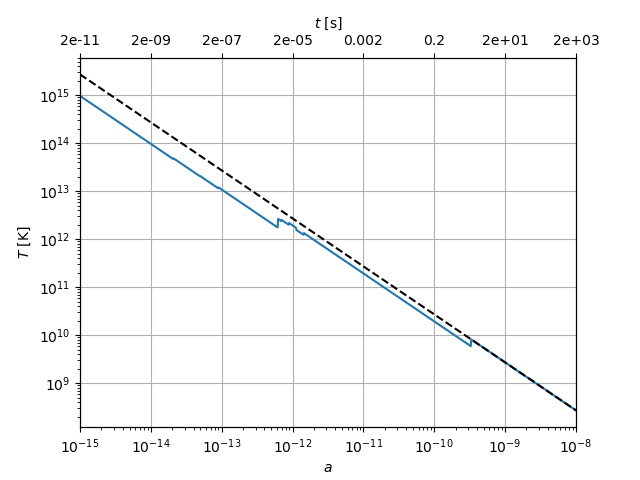

In [58]:
#| label: Ta_plot
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(a, Ts)
ax1.plot(a, T0.value/a, 'k--')
ax1.grid()
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlim(a.min(), a.max())
#ax1.invert_xaxis()
ax2 = plt.gca().twiny()
ax2.set_xscale("log")
ticks = ax1.get_xticks()[::-1]
ticks = ticks[(ticks>=a.min()) & (ticks<=a.max())]
#print(ticks)
#ticks = 10.**np.arange(6, -3, -1)
#print(ticks)
new_ticks = [a_to_time(tick) for tick in ticks]
#print(new_ticks)
ax2.set_xticks(new_ticks)
ax2.set_xticklabels([f"{tick:.0g}" for tick in new_ticks])
ax1.set_xlabel("$a$")
ax1.set_ylabel("$T$ [K]")
ax2.set_xlabel("$t$ [s]")
plt.show()